# Project: Investigate a no show appoiments dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment.

‘Neighborhood’ indicates the location of the hospital.

‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up


### Questions for Analysis
> 1- What age tends to not show up more?
>
> 2- disease that not showed up?
>
> 3- Relation between age and Diabetes. 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [3]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 2.0MB/s eta 0:00:01   14% |████▊                           | 1.6MB 18.5MB/s eta 0:00:01    23% |███████▋                        | 2.5MB 17.5MB/s eta 0:00:01    32% |██████████▌                     | 3.4MB 18.4MB/s eta 0:00:01    40% |█████████████                   | 4.3MB 16.7MB/s eta 0:00:01    48% |███████████████▌                | 5.0MB 16.0MB/s eta 0:00:01    97% |███████████████████████████████ | 10.1MB 18.3MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 1.2MB/s eta 0:00:01   32% |██████████▍                     | 4.3MB 22.9MB/s eta 0:00:01    38% |████████████▌                   | 5.2MB 18.8MB/s eta 0:00:01    45% |██████████████▋                 | 6.1MB 18.0MB/s eta 0:00:01    77% |████████████████████████▉       | 10.4MB 17.8MB/s eta 0:00:01    83% |██████████████████████████▉     | 11.2MB 17.5MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found ex

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#explore the data 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
#check for duplicates
df.duplicated().sum()

0


### Data Cleaning
> 1: Delete useless columns like PatientId and AppointmentID.
>
> 2: Convert ScheduledDay and AppointmentDay to date format.
>
> 3: Delete row that has negative value for age (i will deleted it because it is only one record).
>
> 4: Change any value over 1 in Handcap column to 1 .
>
> 5: Change No-show column name to No_show to match the other columns names
>
> 6: Convert Schoarship, Hipertension, Diabetes, Alcoholism, Handcap and No_show to boolean datatype.
>
> 7: Make column names lower case fro ease of use.

**Delete useless columns like PatientID and AppointmentID.**

In [8]:
df.drop(['AppointmentID','PatientId'],axis = 1, inplace = True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**Convert ScheduledDay and AppointmentDay to date format.**

In [9]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.tz_convert(None)
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.tz_convert(None)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**Delete row that has negative value for age**

In [10]:
#search for any negative value 
for index, row in df.iterrows():
    if row['Age'] < 0:
        df.drop(index, inplace=True)

**Change any value over 1 in Handcap column to 1 .**

In [11]:
df['Handcap'].unique()

array([0, 1, 2, 3, 4])

In [13]:
invalied_handcap = df.query('Handcap in [2,3,4]').index
df.drop(invalied_handcap,inplace = True)
df['Handcap'].unique()

array([0, 1])

**Change No-show column name to No_show to match the other columns names.**

In [14]:
df = df.rename(columns = {'No-show':'No_show'})
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**Convert No_show to int datatype.**

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110327 non-null object
ScheduledDay      110327 non-null datetime64[ns]
AppointmentDay    110327 non-null datetime64[ns]
Age               110327 non-null int64
Neighbourhood     110327 non-null object
Scholarship       110327 non-null int64
Hipertension      110327 non-null int64
Diabetes          110327 non-null int64
Alcoholism        110327 non-null int64
Handcap           110327 non-null int64
SMS_received      110327 non-null int64
No_show           110327 non-null object
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.9+ MB


In [17]:
# i replace the value of No_show to convert it to boolean
df.replace({'No_show' : {'No':'0','Yes':'1'}},inplace = True)
df['No_show']  = df['No_show'].astype('int')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110327 non-null object
ScheduledDay      110327 non-null datetime64[ns]
AppointmentDay    110327 non-null datetime64[ns]
Age               110327 non-null int64
Neighbourhood     110327 non-null object
Scholarship       110327 non-null int64
Hipertension      110327 non-null int64
Diabetes          110327 non-null int64
Alcoholism        110327 non-null int64
Handcap           110327 non-null int64
SMS_received      110327 non-null int64
No_show           110327 non-null int64
dtypes: datetime64[ns](2), int64(8), object(2)
memory usage: 10.9+ MB


<a id='eda'></a>
## Exploratory Data Analysis


### What age tends to not show up more?

In [21]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [78]:
showed= df.No_show == False
no_showed = df.No_show == True

In [115]:
#function to show histogram of attribute that showed up or not
def plot_histogram(df, attribute, mask1, mask2):
    df_masked1 = df[mask1]
    df_masked2 = df[mask2]
    
    plt.hist(df_masked1[attribute], alpha=0.5, label="Showed up")
    plt.hist(df_masked2[attribute], alpha=0.5, label="Not showed up")
    
    plt.xlabel(attribute)
    plt.ylabel("Number of peaple")
    plt.title("Histogram of {}".format(attribute))
    plt.legend()
    plt.show()


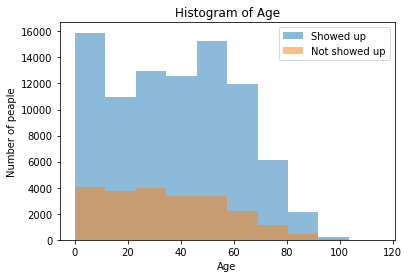

In [116]:
#show ages of people that showed up or not
plot_histogram(df,'Age',showed,no_showed)

People younger than 40 tends to not show up less than people over 40

In [132]:
def plot_histogram_1(df, attributes, mask1, mask2):
    df_masked1 = df[mask1]
    df_masked2 = df[mask2]
    
    fig, axs = plt.subplots(1, len(attributes), figsize=(10, 5), sharey=True)
    for i, attribute in enumerate(attributes):
        axs[i].hist(df_masked1[attribute], alpha=0.5, label="Showed up")
        axs[i].hist(df_masked2[attribute], alpha=0.5, label="Not showed up")
        axs[i].set_xlabel(attribute)
        axs[i].set_title("Histogram of {}".format(attribute))
        axs[i].legend()
    
    plt.show()


### disease that not showed up

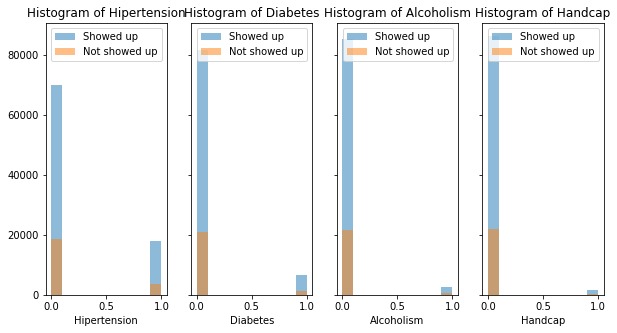

In [133]:
#show a relation between diseases that not showed up
lists =['Hipertension','Diabetes','Alcoholism','Handcap']
plot_histogram_1(df,lists,showed,no_showed)


People that has hipertension showed up less than others

### Relation between age and Diabetes

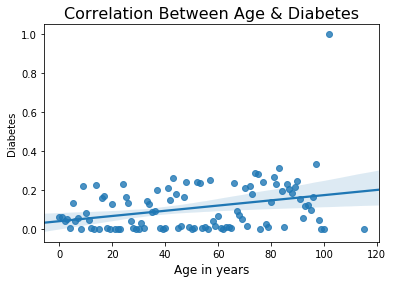

In [141]:
diabetes = df['Diabetes'].groupby(df['Age']).mean()
age = df['Age'].unique()
sns.regplot(x = age , y = diabetes)
plt.xlabel('Age in years',fontsize=12)
plt.title('Correlation Between Age & Diabetes',fontsize=16)
plt.show()

it shows that more older people has diabetes than younger ones

<a id='conclusions'></a>
## Conclusions

The neighbourhood was alot to analysis 

The patientid and appointmentid was not useless in the analysis

The datas was hard to analysis too.

The age affect the showed up of the people .
## Limitations
The neighbourhood wasn't usefull as i planned as it has over 80 unique values, if it was status ,it would be much easier and usefull to use.

And if i get the address of the patient to know the distance between his place and the medical appointment , it would also help in the analysis.

Also the type of the handicap that would help in finding a way to help get to there appointment.

In [142]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0